In [1]:
import pandas as pd
import numpy as np
import keras as kr
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
md_para = pd.read_csv('../data/substituted_benzene_para_/substituted_benzene_para_md.csv')
md_mono = pd.read_csv('../data/substituted_benzene_mono_/substituted_benzene_mono_md.csv')
md_orth = pd.read_csv('../data/substituted_benzene_orth_/substituted_benzene_orth_md.csv')
md_meta = pd.read_csv('../data/substituted_benzene_meta_//substituted_benzene_meta_md.csv')
md = pd.concat([md_mono,md_meta,md_orth,md_para],axis=0,join='inner',ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: '../data/substituted_benzene_para_/substituted_benzene_para_md.csv'

In [3]:
gammadata_mono = pd.read_csv('../data/substituted_benzene_mono_/substituted_benzene_mono_gamma.csv')
gammadata_meta = pd.read_csv('../data/substituted_benzene_meta_/substituted_benzene_meta_gamma.csv')
gammadata_orth = pd.read_csv('../data/substituted_benzene_orth_/substituted_benzene_orth_gamma.csv')
gammadata_para = pd.read_csv('../data/substituted_benzene_para_/substituted_benzene_para_gamma.csv')
gammadata = pd.concat([gammadata_mono,gammadata_meta,gammadata_orth,gammadata_para],axis=0,join='inner',ignore_index=True)

In [21]:
result = pd.merge(md, gammadata, on='name')
#result = result.sort_values(by='gamma', ascending=False)

Y = result.iloc[:, -1]
Y = np.array(Y, dtype = np.float32)
Y=Y/45000

X = result.iloc[:, 1:-3]
X = X[X.T[X.dtypes!=np.object].index]
X = np.array(X, dtype = np.float32)
st = StandardScaler()
X= st.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=42)
model = Sequential()
#输入层。传递给下一层的维度为50。 输入数据维度（input_dim）是1114。
model.add(Dense(units = 50, input_dim = X.shape[1]))
#model.add(Activation("relu"))
model.add(Activation("sigmoid"))
#model.add(Activation("relu"))
#model.add(Activation("sigmoid"))
#输出层。 维度1，即输出单个值。
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                64200     
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 64,251
Trainable params: 64,251
Non-trainable params: 0
_________________________________________________________________


In [6]:
#SGD是随机梯度下降法。 nesterov是Nesterov的加速度梯度下降法。
model.compile(loss = 'mean_squared_error', optimizer = SGD(lr = 0.001, momentum = 0.9, nesterov = True),metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 500, batch_size = 32,validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)
rms = (np.mean((y_test - y_pred) ** 2)) ** 0.5
#s = np.std(y_test - y_pred)
print("Neural Network RMS", rms)

Epoch 1/500
9/9 [==============================] - 2s 164ms/step - loss: 0.6419 - accuracy: 0.0000e+00 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 2/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0645 - accuracy: 0.0000e+00 - val_loss: 0.0955 - val_accuracy: 0.0000e+00
Epoch 3/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0788 - accuracy: 0.0000e+00 - val_loss: 0.0405 - val_accuracy: 0.0000e+00
Epoch 4/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0454 - accuracy: 0.0000e+00 - val_loss: 0.0293 - val_accuracy: 0.0000e+00
Epoch 5/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0411 - accuracy: 0.0000e+00 - val_loss: 0.0274 - val_accuracy: 0.0000e+00
Epoch 6/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0282 - accuracy: 0.0000e+00 - val_loss: 0.0257 - val_accuracy: 0.0000e+00
Epoch 7/500
9/9 [==============================] - 0s 12ms/step - loss: 0.0325 - accuracy: 0.0000e+00 - val_los

<Figure size 432x288 with 0 Axes>

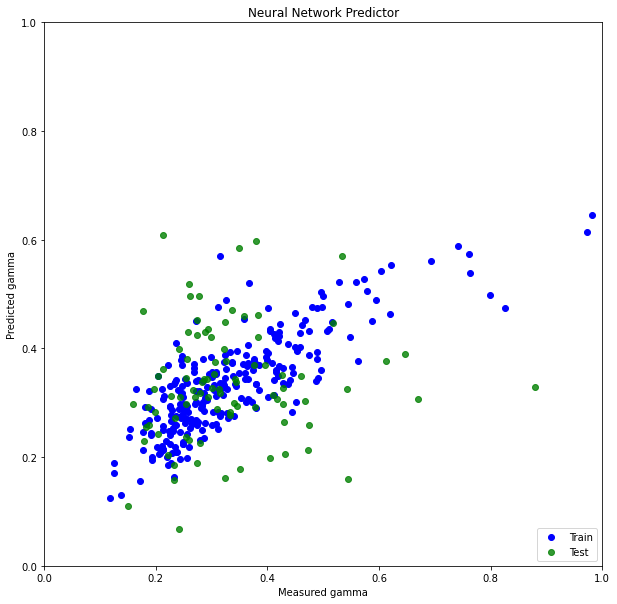

In [30]:
plt.figure()
plt.figure(figsize=(10,10))
plt.scatter(y_train, model.predict(X_train), label = 'Train', c = 'blue')
plt.title('Neural Network Predictor')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Measured gamma')
plt.ylabel('Predicted gamma')
plt.scatter(y_test, model.predict(X_test), c = 'green', label = 'Test', alpha = 0.8)
plt.legend(loc = 4)
plt.savefig('Neural Network Predictor.png', dpi=500)
plt.show()

## 起码大的不会预测小，小的可能预测大

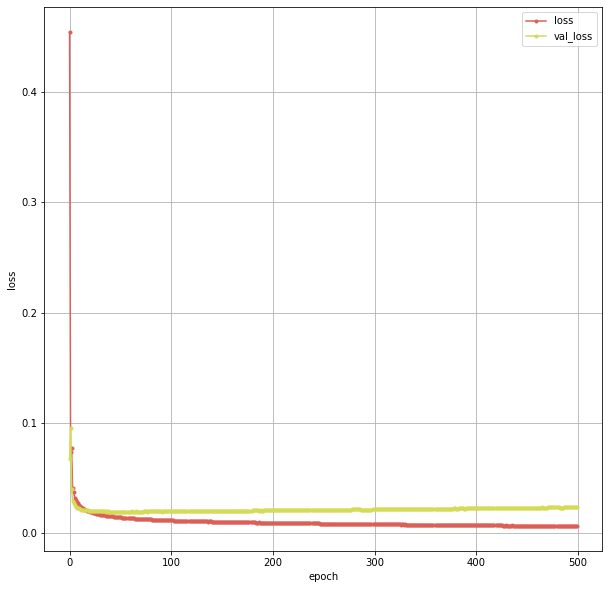

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(loss)
plt.figure(figsize=(10,10))
plt.plot(range(epochs), loss, marker = '.', label = 'loss')
plt.plot(range(epochs), val_loss, marker = '.', label = 'val_loss')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('loss & val_loss for epochs.png', dpi=500)
plt.show()


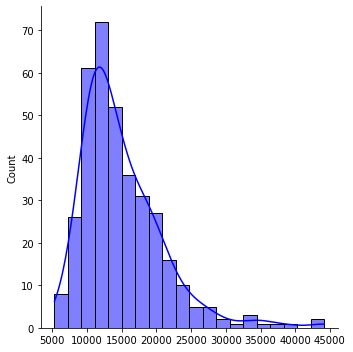

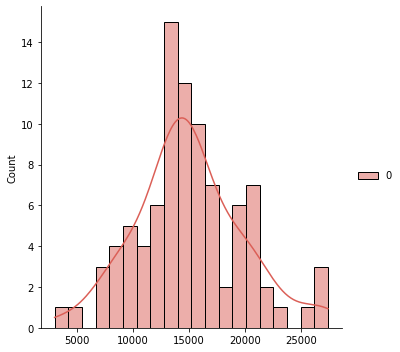

In [26]:
import seaborn as sns 
#Y=Y*45000
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.displot(Y,color="b",bins=20,kde=True)
sns.displot(model.predict(X_test)*45000,color="g",bins=20,kde=True)
plt.savefig('realhhhh gamma hist.png', dpi=500)
plt.show()


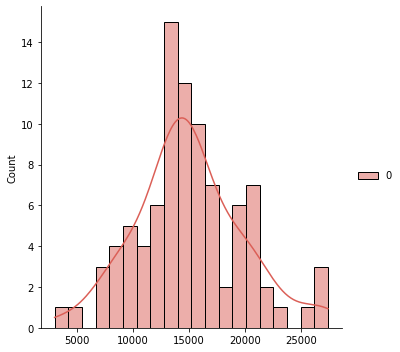

In [20]:
import seaborn as sns 

#sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.displot(model.predict(X_test)*45000,color="g",bins=20,kde=True)
plt.savefig('predicted gamma hist.png', dpi=500)
plt.show()


### 众数的位置是差不多的，但是由于数据集太小，尤其是测试集中缺少大γ的样本点，导致没有显示出高γ的信息.但训练出来了负值就很可笑，这是一个严肃的问题